<a href="https://colab.research.google.com/github/asheta66/Machine-Learning-2022/blob/main/Simple%20Linear%20Regression/Simple_Linear_Regression_boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Simple Linear Regression
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#import pandas as pd
#con = pd.read_csv('Data/ConcreteStrength.csv')
#con

# Importing the datasets
import sklearn.datasets
boston = sklearn.datasets.load_boston()
X, y = boston['data'], boston['target']

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state = 0)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
print(boston.keys())
print(boston.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highway

In [ ]:
# Import pandas
import pandas as pd
# Read the DataFrame, first using the feature data
df = pd.DataFrame(boston.data, columns=boston.feature_names)
# Add a target column, and fill it with the target data
df['target'] = boston.target
# Show the first five rows

df.info()
df.head(-20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,5.70818,0.0,18.10,0.0,0.532,6.750,74.9,3.3317,24.0,666.0,20.2,393.07,7.74,23.7
482,5.73116,0.0,18.10,0.0,0.532,7.061,77.0,3.4106,24.0,666.0,20.2,395.28,7.01,25.0
483,2.81838,0.0,18.10,0.0,0.532,5.762,40.3,4.0983,24.0,666.0,20.2,392.92,10.42,21.8
484,2.37857,0.0,18.10,0.0,0.583,5.871,41.9,3.7240,24.0,666.0,20.2,370.73,13.34,20.6


In [ ]:
# Fitting Simple Linear Regression to the training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set result ￼
y_pred_train = regressor.predict(X_train)
y_pred_test  = regressor.predict(X_test)

# Showing the model parameters which include the interecpt (a0) and the rest of model paremeters
regressor.score(X_train, y_train)
print('Showing the developed LR model parameters')
print('a0=', format(regressor.intercept_,".5f"));
formatted_array = ["%i: %s" % (index+1, val) for index, val in  enumerate(regressor.coef_)]
print(formatted_array)

Showing the developed LR model parameters
a0= 36.93326
['1: -0.1177352893086034', '2: 0.0440174968952163', '3: -0.005768143138901569', '4: 2.3934159404901885', '5: -15.589421129396802', '6: 3.768967698586184', '7: -0.0070351782782208045', '8: -1.4349564133200288', '9: 0.2400810856251189', '10: -0.011297280957547201', '11: -0.9855467321312533', '12: 0.008444434527728736', '13: -0.49911679732612657']


In [ ]:
# Calculating Performance Criteria
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score

mse1 = mean_squared_error(y_train, y_pred_train)
mse2 = mean_squared_error(y_test, y_pred_test)

mae1 = mean_absolute_error(y_train, y_pred_train)
mae2 = mean_absolute_error(y_test, y_pred_test)

vs1 = explained_variance_score(y_train, y_pred_train)
vs2 = explained_variance_score(y_test, y_pred_test)


print('mean_squared_error_train (MSE):', format(mse1,".5f"), '    ', 'mean_squared_error_test (MSE):', format(mse2,".5f"),)
print('mean_absolute_error_train (MAE):', format(mae1,".5f"), '    ', 'mean_absolute_error_test (MAE):', format(mae2,".5f"),)
print('Variance_score_train (VarScore):', format(vs1,".5f"), '    ', 'Variance_score_test (VarScore):', format(vs2,".5f"),)


mean_squared_error_train (MSE): 19.64052      mean_squared_error_test (MSE): 29.78225
mean_absolute_error_train (MAE): 3.10397      mean_absolute_error_test (MAE): 3.66833
Variance_score_train (VarScore): 0.76977      Variance_score_test (VarScore): 0.63845


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.style
import matplotlib as mpl
from matplotlib import pyplot as plt
from cycler import cycler

mpl.rcParams['axes.prop_cycle'] = cycler(color='bgrcmyk')

mpl.rcParams['lines.linewidth'] = 1.0
mpl.rcParams['lines.dashed_pattern'] = [6, 6]
mpl.rcParams['lines.dashdot_pattern'] = [3, 5, 1, 5]
mpl.rcParams['lines.dotted_pattern'] = [1, 3]
mpl.rcParams['lines.scale_dashes'] = False

mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['mathtext.rm'] = 'serif'

mpl.rcParams['legend.fancybox'] = False
mpl.rcParams['legend.loc'] = 'upper right'
mpl.rcParams['legend.numpoints'] = 2
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['legend.framealpha'] = None
mpl.rcParams['legend.scatterpoints'] = 3
mpl.rcParams['legend.edgecolor'] = 'inherit'

mpl.rcParams['legend.fancybox'] = False
mpl.rcParams['legend.loc'] = 'upper right'
mpl.rcParams['legend.numpoints'] = 2
mpl.rcParams['legend.fontsize'] = 'small'
mpl.rcParams['legend.framealpha'] = None
mpl.rcParams['legend.scatterpoints'] = 3
mpl.rcParams['legend.edgecolor'] = 'inherit'


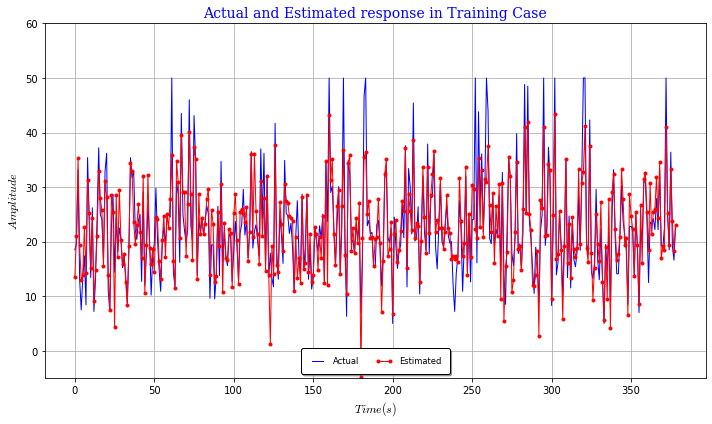

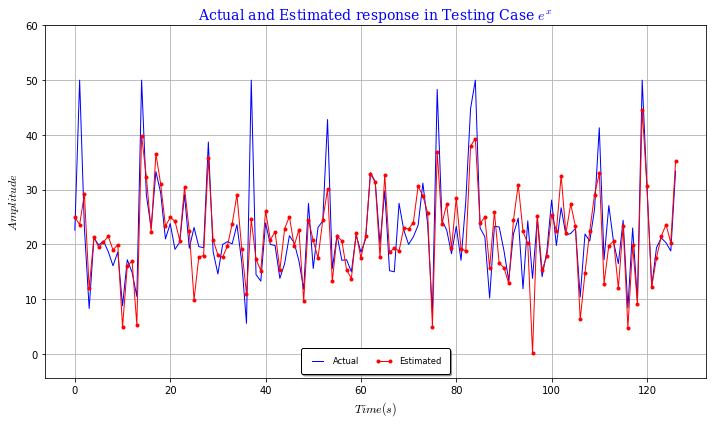

In [ ]:
# Drawing the actual and estimated responses

fig, axs = plt.subplots(figsize=(10, 6), tight_layout=True)
plt.plot(y_train, '-b', label='Actual')
plt.plot(y_pred_train, '.-r', label='Estimated')
plt.xlabel(r'$ Time (s)$', fontsize=12)
plt.ylabel(r'$ Amplitude$', fontsize=12)
plt.title(r'Actual and Estimated response in Training Case', fontname= 'serif',fontsize=14, color='b')
plt.ylim(np.min(y_train)-10, np.max(y_train)+10)
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, frameon=True, loc='lower center', ncol=2)
plt.grid(True)
plt.show()

fig, axs = plt.subplots(figsize=(10, 6), tight_layout=True)
plt.plot(y_test, '-b', label='Actual')
plt.plot(y_pred_test, '.-r', label='Estimated')
plt.xlabel(r'$ Time (s)$', fontsize=12)
plt.ylabel(r'$ Amplitude$', fontsize=12)
plt.title(r'Actual and Estimated response in Testing Case, fontname= 'serif',fontsize=14, color='b')
plt.ylim(np.min(y_test)-10, np.max(y_test)+10)
plt.grid(True)
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, frameon=True, loc='lower center', ncol=2)
plt.savefig(r'C:\Users\Admin\Desktop\Data Science Class\Simple_Linear_Regression\Actual_Estimated.png')
plt.show()

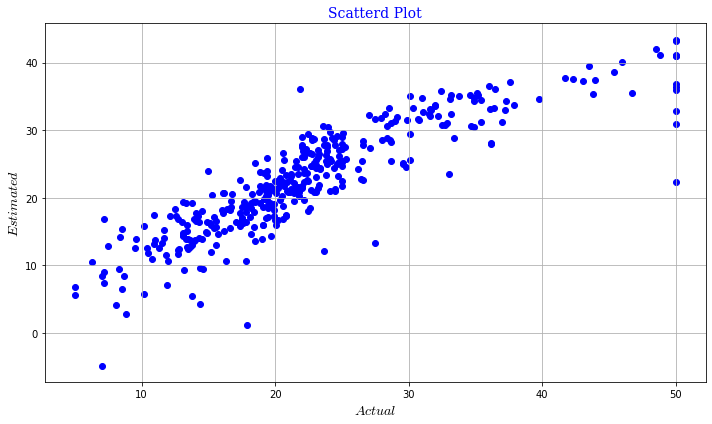

In [ ]:
# drawing Scatterplots
fig, axs = plt.subplots(figsize=(10, 6), tight_layout=True)
plt.scatter(y_train, y_pred_train)
plt.xlabel(r'$ Actual $', fontname= 'serif',fontsize=14, color='k')
plt.ylabel(r'$ Estimated $', fontname= 'serif',fontsize=14, color='k')
plt.title(r'Scatterd Plot', fontname= 'serif',fontsize=14, color='b')
plt.grid(True)
plt.savefig(r'C:\Users\Admin\Desktop\Data Science Class\Simple_Linear_Regression\scatter.png')
plt.show()
